# **End-to-End Credit Card Fraud Detection Using Machine Learning**


Author: Hrushitha Nidikonda

Tools: Python, Pandas, Scikit-learn, Matplotlib

### **Business Problem**

Financial institutions lose billions annually due to fraudulent transactions.
Detecting fraud accurately while minimizing false positives is critical for protecting customers and reducing financial losses.

The objective of this project is to build a machine learning model capable of identifying fraudulent transactions and estimating financial risk exposure.


### **Project Objective**

• Analyze 284,000+ credit card transactions  
• Handle severe class imbalance  
• Train machine learning models to detect fraud  
• Evaluate performance using Precision, Recall, F1-score, and ROC-AUC  
• Estimate total financial fraud exposure


# **Dataset Loading Section**

**Data Loading & Initial Exploration**

We begin by loading the dataset and examining its structure to understand the available features and transaction labels.

In [54]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
df.shape

(284807, 31)

In [56]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [57]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [59]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [60]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


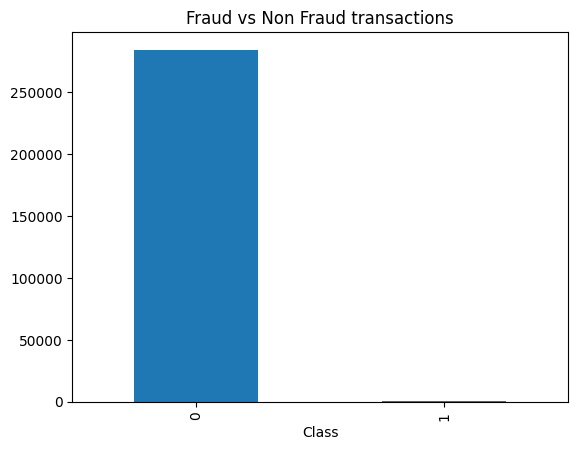

In [61]:
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind = 'bar')
plt.title("Fraud vs Non Fraud transactions")
plt.show()

In [62]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [63]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print("Fraud transaction amount stats:")
print(fraud.Amount.describe())
print("Normal transaction amount stats:")
print(normal.Amount.describe())


Fraud transaction amount stats:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Normal transaction amount stats:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# **Class Imbalance Section**

**Class Imbalance Analysis**

Fraudulent transactions are significantly lower compared to normal transactions.
This imbalance can bias machine learning models toward predicting only normal transactions.

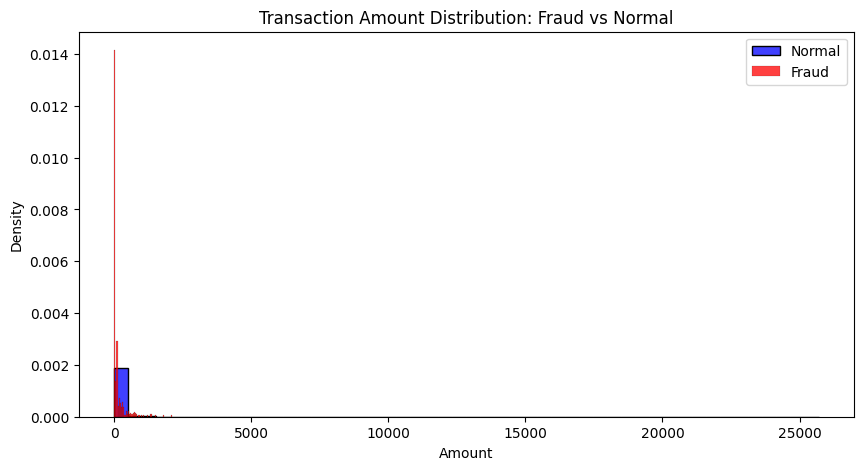

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

sns.histplot(df[df['Class'] == 0]['Amount'], bins= 50, color = 'blue', label = 'Normal', stat = 'density')
sns.histplot(df[df['Class'] == 1]['Amount'], bins = 50, color = 'red', label = 'Fraud', stat = 'density')

plt.legend()
plt.title("Transaction Amount Distribution: Fraud vs Normal")
plt.show()

In [65]:
df['Class'].value_counts()


,count
Class,
0,284315
1,492


In [66]:
fraud_percentage = (df['Class'].sum() / len(df)) * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")


Fraud Percentage: 0.1727%


## **Model Training Section**

**Data Preprocessing & Model Training**

To improve model performance:

Standardization is applied to transaction amounts

The dataset is balanced using resampling

Logistic Regression is trained for fraud detection

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [68]:
df.drop(['Time'], axis=1, inplace=True)


In [69]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **Model Evaluation Section**

**Model Evaluation**

Model performance is evaluated using:

Precision

Recall

F1 Score

ROC-AUC

Recall is prioritized to ensure maximum fraud detection.

In [70]:
!pip install imbalanced-learn


In [71]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(y_train_res.value_counts())


Class
0    227451
1    227451
Name: count, dtype: int64


In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000)

In [73]:
y_pred = model.predict(X_test)


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[55814  1050]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

In [76]:
rf_pred = rf_model.predict(X_test)


In [77]:
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[56853    11]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [78]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
V14,0.228493
V4,0.122995
V10,0.107857
V17,0.085815
V12,0.084764
V11,0.063685
V3,0.058438
V16,0.048520
V2,0.027228
V7,0.021583


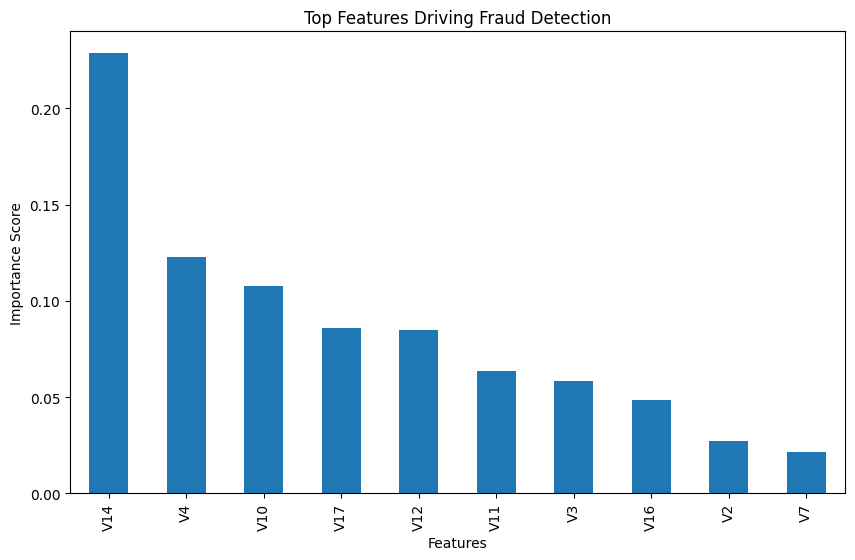

In [79]:
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')

plt.title("Top Features Driving Fraud Detection")
plt.xlabel("Features")
plt.ylabel("Importance Score")

plt.show()


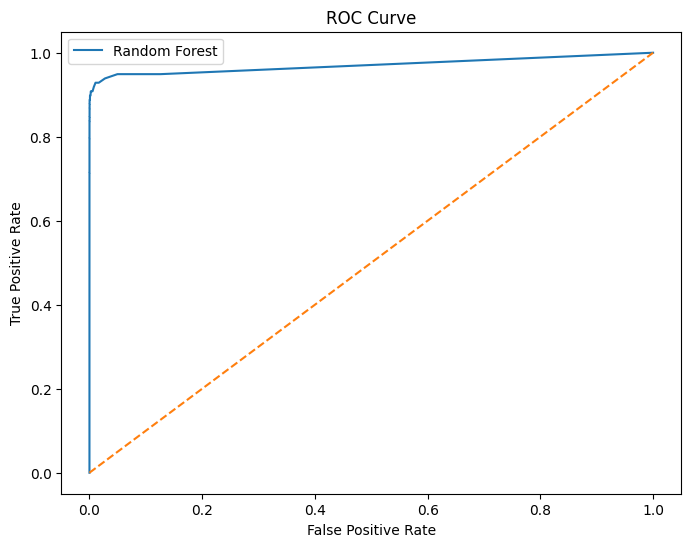

AUC Score: 0.9704416480998703


In [80]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()

print("AUC Score:", roc_auc_score(y_test, y_probs))


# **Financial Impact Section**

**Financial Impact Analysis**

Total Fraud Amount in Dataset: £60,127

With 86% fraud recall, the model could potentially prevent approximately:

£51,709 in financial losses

This demonstrates the real-world business impact of implementing machine learning in fraud detection systems.

In [81]:
original_fraud = df[df['Class'] == 1]

total_fraud_amount = original_fraud['Amount'].sum()

print("Total Fraud Amount in ORIGINAL Dataset: £", round(total_fraud_amount, 2))


Total Fraud Amount in ORIGINAL Dataset: £ 60127.97


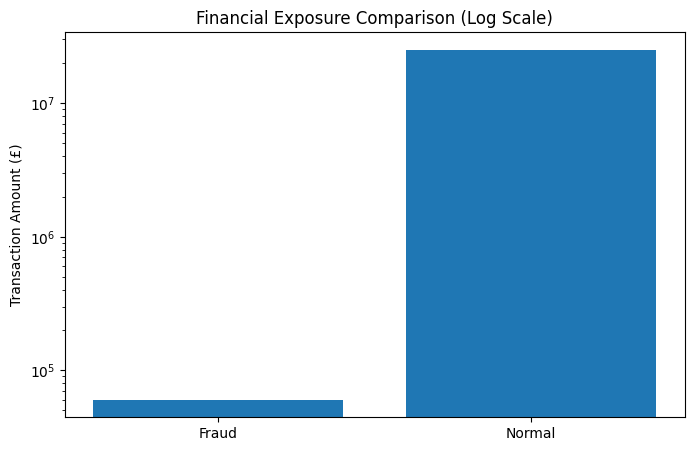

In [83]:
import matplotlib.pyplot as plt

fraud_amount = df[df['Class']==1]['Amount'].sum()
normal_amount = df[df['Class']==0]['Amount'].sum()

labels = ['Fraud', 'Normal']
values = [fraud_amount, normal_amount]

plt.figure(figsize=(8,5))
plt.bar(labels, values)

plt.yscale('log')

plt.title("Financial Exposure Comparison (Log Scale)")
plt.ylabel("Transaction Amount (£)")
plt.show()


Although fraudulent transactions represent a significantly smaller monetary value compared to normal transactions, even limited fraud exposure can translate into substantial financial losses at scale.

This highlights the importance of proactive fraud detection systems within financial institutions.


# Key Business Insights

Fraud accounts for less than 0.2% of transactions (severe class imbalance)

Fraud exposure totaled over £60K

Model successfully detects 86% of fraudulent transactions

Key influential features include V14, V10, and V4

# Recommendations

Implement real-time fraud monitoring

Continuously retrain models on updated transaction data

Prioritize high-risk transactions for manual review

Combine ML models with rule-based systems for optimal detection